### Machine Learning for Classification

##### This is a classification task to predict if a client has signed up on the platform or not.

In [226]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score

> Load Dataset

In [227]:
train_data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
train_data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [228]:
# understanding dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [229]:
train_data.fillna(
    {col: "NA" if train_data[col].dtype == "object" else 0 for col in train_data.columns},
    inplace=True
)


In [230]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


##### Question 1

In [231]:
freq_industry = train_data.industry.mode()
print(freq_industry)

0    retail
Name: industry, dtype: object


##### Question 2

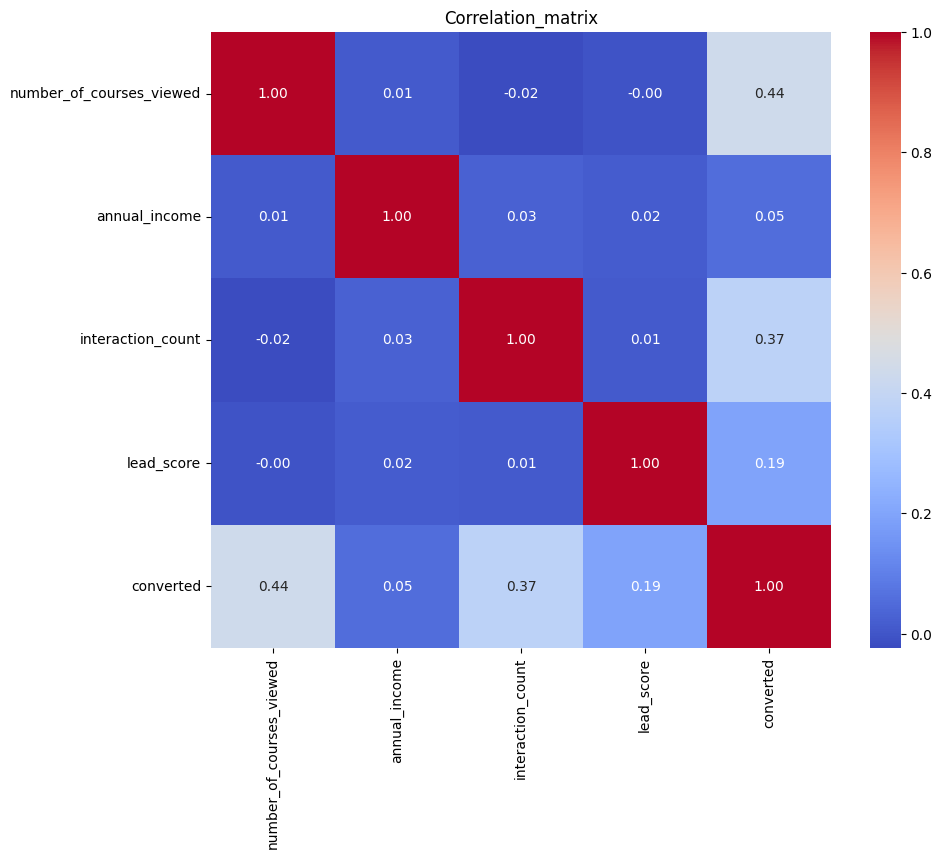

In [232]:
# Understanding correlation
corr_matrix = train_data.corr(numeric_only = True)

# Display
corr_matrix

# Visualizing 
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation_matrix")
plt.show()

In [233]:
# Define target 
target = "converted"
X = train_data.drop(target, axis = 1)
y = train_data[target]

# Split data  into train and test data
X_, X_test, y_, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Split data into train and validation set  
X_train, X_val, y_train, y_val = train_test_split(X_,y_,test_size = 0.25, random_state = 42)


In [234]:
print(y_val.shape == y_test.shape)

True


##### Question 3

In [235]:
mi_scores = {}

for col in X_train.columns:
    if X_train[col].dtype == "object":
        mi = round(mutual_info_score(y_train, X_train[col]),2)
        mi_scores[col] = mi

# Convert to DataFrame for easier viewing
mi_df = pd.DataFrame(mi_scores.items(), columns=['Feature', 'Mutual Information Score'])
mi_df.sort_values(by='Mutual Information Score', ascending=False, inplace=True)

print(mi_df)

             Feature  Mutual Information Score
0        lead_source                      0.04
1           industry                      0.01
2  employment_status                      0.01
3           location                      0.00


In [236]:
from sklearn.feature_extraction import DictVectorizer
# Create the DictVectorizer
dv = DictVectorizer(sparse=False)

def encode_with_dv(df, fit=False):
   
   # Select categorical and numeric columns
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    num_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

    # Convert to list of dictionaries
    df_dict = df[cat_cols + num_cols].to_dict(orient="records")

    # Fit or just transform depending on the dataset
    if fit:
        encoded = dv.fit_transform(df_dict)
    else:
        encoded = dv.transform(df_dict)

    return encoded


In [237]:
X_train = encode_with_dv(X_train, fit=True)
X_val = encode_with_dv(X_val)
X_test = encode_with_dv(X_test)

In [238]:
X_train

array([[5.8472e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.1738e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [8.1973e+04, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [8.9042e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0259e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00]], shape=(876, 31))

In [239]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [240]:
# Building a logistic regression model
model = LogisticRegression(solver="liblinear", C=10, 
                           max_iter=1000, random_state=42)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [241]:
val_pred = model.predict(X_val)

(y_val == val_pred).mean()

np.float64(0.6996587030716723)

In [242]:
val_pred_df = pd.DataFrame()
val_pred_df["probability"] = val_pred
val_pred_df["prediction"] = convert_decision.astype(int)
val_pred_df["actual"] = y_val

In [243]:
val_pred_df

,probability,prediction,actual
0,1,0,0
1,1,1,1
2,1,0,0
3,0,0,0
4,1,0,0
...,...,...,...
288,0,0,0
289,1,1,1
290,0,0,0
291,1,1,1


#### Save Model

In [ ]:
import pickle